In [1]:
import pyforest

In [2]:
data = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

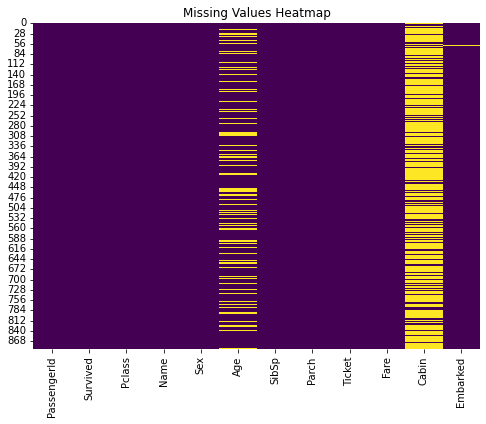

In [6]:
missing_data = data.isnull()

# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(missing_data, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<IPython.core.display.Javascript object>

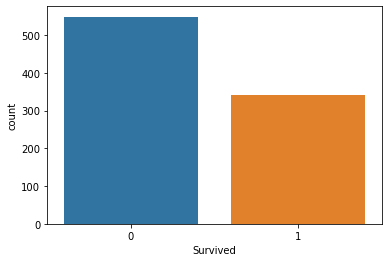

In [8]:
sns.countplot(x='Survived', data=data);


<IPython.core.display.Javascript object>

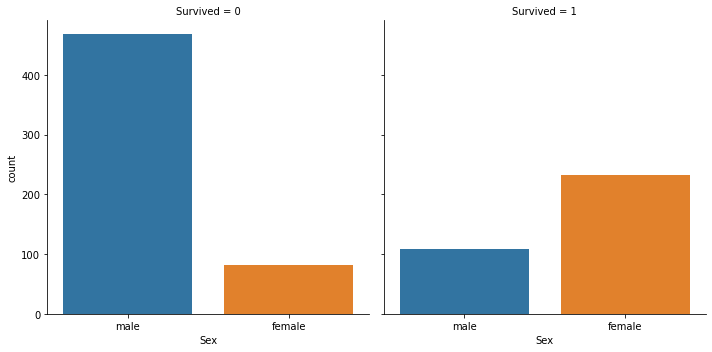

In [9]:
sns.catplot(x='Sex', col='Survived', kind='count', data=data);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

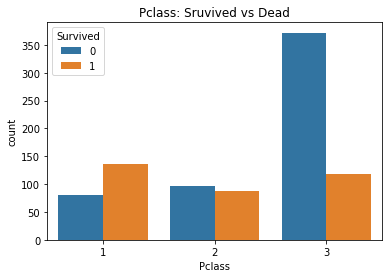

In [10]:
sns.countplot(x = 'Pclass', hue='Survived', data=data)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

<IPython.core.display.Javascript object>

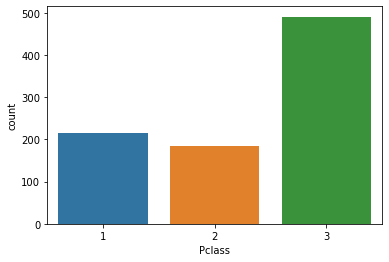

In [11]:
sns.countplot(x='Pclass', data=data);


In [12]:
Percentage_3rd = (len([i for i in data['Pclass'].values if i == 3]) / data.shape[0]) * 100

In [13]:
Percentage_3rd

55.106621773288445

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

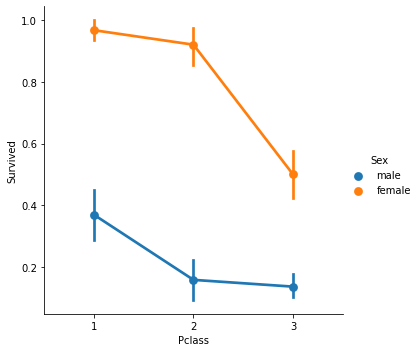

In [14]:
sns.catplot(x='Pclass', y='Survived', kind='point', hue='Sex', data=data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

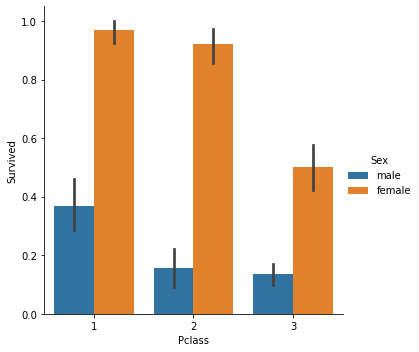

In [20]:
sns.catplot(x='Pclass', y='Survived', kind='bar', hue='Sex', data=data)
plt.show()

In [15]:
def categorize_passenger(passenger):
    if passenger['Age'] >= 18:
        if passenger['Sex'] == 'male':
            return 'Men'
        else:
            return 'Women'
    else:
        return 'Children'

# Apply the categorization function to each row in the DataFrame
data['who'] = data.apply(categorize_passenger, axis=1)

<IPython.core.display.Javascript object>

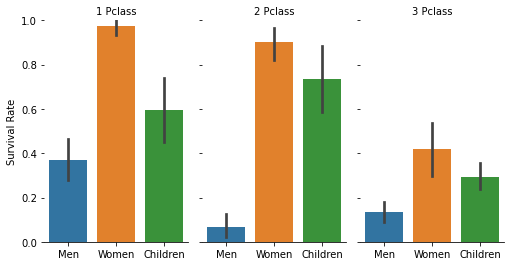

In [16]:
g = sns.catplot(
    data=data, x="who", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

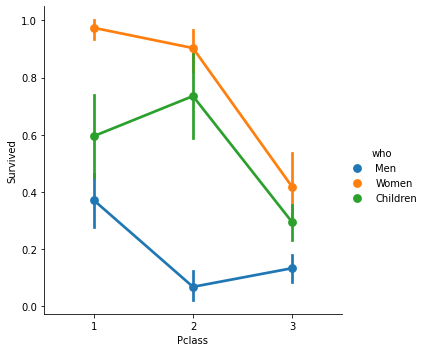

In [17]:
sns.catplot(x='Pclass', y='Survived', kind='point', hue='who', data=data)
plt.show()

<IPython.core.display.Javascript object>

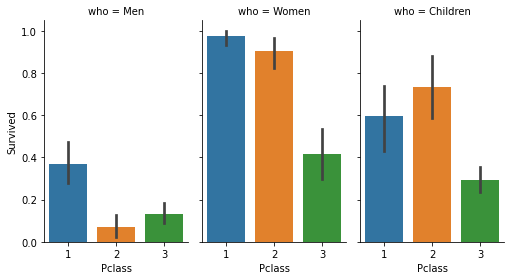

In [18]:
sns.catplot(
    data=data, x="Pclass", y="Survived", col="who",
    kind="bar", height=4, aspect=.6,
)

<IPython.core.display.Javascript object>

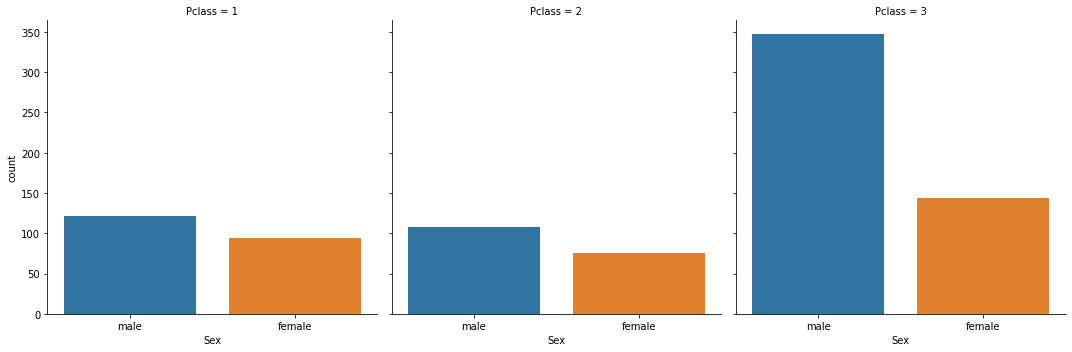

In [19]:
sns.catplot(x='Sex', col='Pclass', kind='count', data=data);
